In [29]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split 

ds = pd.read_csv("../data/antwerp_combo_raw_ref.csv")

In [30]:
from data_preprocess import DataPreprocess as dp

x, y = dp().data_cleaning(ds, wathear_data=True)


Size before cleaning:  (130282, 114)
Size after cleaning:  (55303, 114)


In [31]:
# x_rssi_scaled = dp().scaling(scaler='MinMax', x=x_rssi.drop(columns=['RX Time', 'gw_info_row_id'], axis=1))  # remove the timestamp. will be added later 
x_w_scaled = dp().scaling(scaler='MinMax', x=x.drop(columns=['RX Time', 'gw_info_row_id'], axis=1))  # remove the timestamp. will be added later 

# x_rssi_scaled['timestamp'] = x_rssi['RX Time']
# x_rssi_scaled['gw_ref'] = x_rssi['gw_info_row_id']
x_w_scaled['timestamp'] = x['RX Time']
x_w_scaled['gw_ref'] = x['gw_info_row_id']

# x_rssi_train, x_rssi_test, x_rssi_val, y_rssi_train, y_rssi_test, y_rssi_val = dp().data_spliting(x_scaled=x_rssi_scaled, y=y, train_size=0.7, random_state=42, val_size=0.0001)
x_w_train, x_w_test, x_w_val, y_w_train, y_w_test, y_w_val = dp().data_spliting(x_scaled=x_w_scaled, y=y, train_size=0.7, random_state=42, val_size=0.001)

Training shape:      (38712, 110)
Test shape:          (16575, 110)
Validation shape:    (16, 110)


In [ ]:
x.columns.values[73:].tolist()

['RX Time',
 'SF',
 'date',
 'temperature_2m',
 'relative_humidity_2m',
 'dew_point_2m',
 'apparent_temperature',
 'precipitation',
 'rain',
 'snowfall',
 'snow_depth',
 'weather_code',
 'pressure_msl',
 'surface_pressure',
 'cloud_cover',
 'cloud_cover_low',
 'cloud_cover_mid',
 'cloud_cover_high',
 'et0_fao_evapotranspiration',
 'vapour_pressure_deficit',
 'wind_speed_10m',
 'wind_speed_100m',
 'wind_direction_10m',
 'wind_direction_100m',
 'wind_gusts_10m',
 'shortwave_radiation',
 'direct_radiation',
 'diffuse_radiation',
 'direct_normal_irradiance',
 'global_tilted_irradiance',
 'terrestrial_radiation',
 'shortwave_radiation_instant',
 'direct_radiation_instant',
 'diffuse_radiation_instant',
 'direct_normal_irradiance_instant',
 'global_tilted_irradiance_instant',
 'terrestrial_radiation_instant']

In [ ]:
# linear regression feature importance
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.inspection import permutation_importance

def feature_importance_calculator(model, x_scaled, y_column, features):
	# fit the model
	model.fit(x_scaled, y_column)
	model_name = type(model).__name__
	# get importance
	if model_name=='LinearRegression':
		importance = model.coef_
	elif model_name=='DecisionTreeRegressor' or model_name=='RandomForestRegressor' or model_name=='XGBRegressor':
		importance = model.feature_importances_
	elif model_name=='KNeighborsRegressor':
		# perform permutation importance
		results = permutation_importance(model, x_scaled, y_column, scoring='neg_mean_squared_error')
		importance = results.importances_mean
	# summarize feature importance
	for i,v in enumerate(importance):
		print(f'Feature: {features[i]}, Score: {v:.11f}')
	# plot feature importance
	plt.bar([im for im in range(len(importance))], importance)
	plt.savefig(f'plots/feature_importance_{model_name}_{y_column.name}.png')
	plt.show()
	

# define the model
model = LinearRegression()
	
# feature_importance_calculator(model, x_scaled, y['Latitude'])
# feature_importance_calculator(model, x_scaled, y['Longitude'])

Feature: BS 1, Score: 0.00704
Feature: BS 2, Score: 0.00214
Feature: BS 3, Score: 0.00023
Feature: BS 4, Score: 0.01564
Feature: BS 5, Score: 0.17237
Feature: BS 6, Score: 0.00210
Feature: BS 7, Score: 0.00121
Feature: BS 8, Score: 0.00000
Feature: BS 9, Score: 0.01917
Feature: BS 10, Score: 0.55963
Feature: BS 11, Score: 0.03570
Feature: BS 12, Score: 0.00831
Feature: BS 13, Score: 0.00000
Feature: BS 14, Score: 0.01398
Feature: BS 15, Score: 0.00049
Feature: BS 16, Score: 0.00009
Feature: BS 17, Score: 0.00273
Feature: BS 18, Score: 0.07166
Feature: BS 19, Score: 0.00306
Feature: BS 20, Score: 0.02920
Feature: BS 21, Score: 0.00000
Feature: BS 22, Score: 0.00186
Feature: BS 23, Score: 0.00086
Feature: BS 24, Score: 0.00000
Feature: BS 25, Score: 0.00123
Feature: BS 26, Score: 0.00000
Feature: BS 27, Score: 0.00637
Feature: BS 28, Score: 0.00000
Feature: BS 29, Score: 0.00000
Feature: BS 30, Score: 0.00000
Feature: BS 31, Score: 0.00322
Feature: BS 32, Score: 0.00506
Feature: BS 33, S

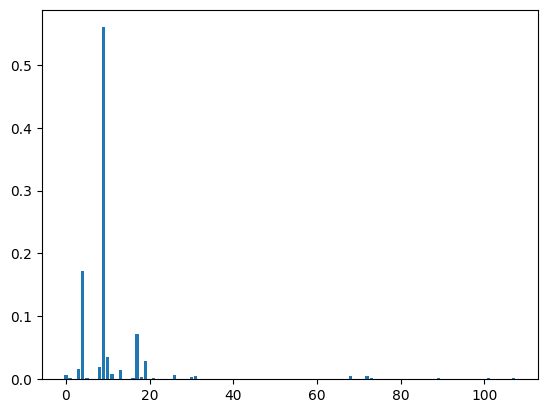

Feature: BS 1, Score: 0.00843
Feature: BS 2, Score: 0.00728
Feature: BS 3, Score: 0.00066
Feature: BS 4, Score: 0.00694
Feature: BS 5, Score: 0.01300
Feature: BS 6, Score: 0.00197
Feature: BS 7, Score: 0.22729
Feature: BS 8, Score: 0.00000
Feature: BS 9, Score: 0.01790
Feature: BS 10, Score: 0.04423
Feature: BS 11, Score: 0.01422
Feature: BS 12, Score: 0.02591
Feature: BS 13, Score: 0.00000
Feature: BS 14, Score: 0.00842
Feature: BS 15, Score: 0.17194
Feature: BS 16, Score: 0.00112
Feature: BS 17, Score: 0.06219
Feature: BS 18, Score: 0.01316
Feature: BS 19, Score: 0.04207
Feature: BS 20, Score: 0.01278
Feature: BS 21, Score: 0.00000
Feature: BS 22, Score: 0.00171
Feature: BS 23, Score: 0.00217
Feature: BS 24, Score: 0.00000
Feature: BS 25, Score: 0.03317
Feature: BS 26, Score: 0.00000
Feature: BS 27, Score: 0.10585
Feature: BS 28, Score: 0.00000
Feature: BS 29, Score: 0.00000
Feature: BS 30, Score: 0.00000
Feature: BS 31, Score: 0.00254
Feature: BS 32, Score: 0.01686
Feature: BS 33, S

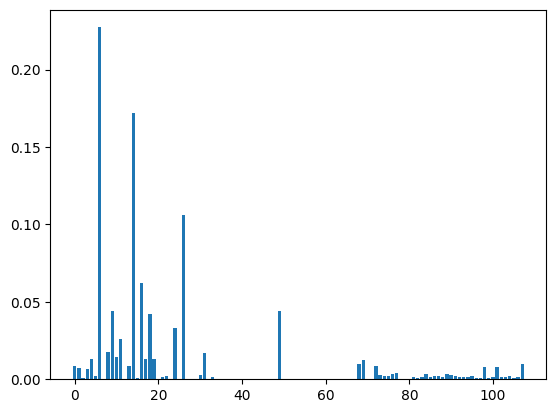

In [ ]:
# DecisionTreeRegressor feature importance

from sklearn.tree import DecisionTreeRegressor

dr_model = DecisionTreeRegressor()

df_cols = x_w_scaled.drop(columns=['timestamp', 'gw_ref']).columns.tolist()

feature_importance_calculator(dr_model, x_w_scaled.drop(columns=['timestamp', 'gw_ref']), y['Latitude'], df_cols)
feature_importance_calculator(dr_model, x_w_scaled.drop(columns=['timestamp', 'gw_ref']), y['Longitude'], df_cols)

Feature: BS 1, Score: 0.00968
Feature: BS 2, Score: 0.00275
Feature: BS 3, Score: 0.00038
Feature: BS 4, Score: 0.01520
Feature: BS 5, Score: 0.17224
Feature: BS 6, Score: 0.00201
Feature: BS 7, Score: 0.00132
Feature: BS 8, Score: 0.00000
Feature: BS 9, Score: 0.01747
Feature: BS 10, Score: 0.56023
Feature: BS 11, Score: 0.03563
Feature: BS 12, Score: 0.00827
Feature: BS 13, Score: 0.00000
Feature: BS 14, Score: 0.01368
Feature: BS 15, Score: 0.00045
Feature: BS 16, Score: 0.00016
Feature: BS 17, Score: 0.00269
Feature: BS 18, Score: 0.07145
Feature: BS 19, Score: 0.00297
Feature: BS 20, Score: 0.02867
Feature: BS 21, Score: 0.00000
Feature: BS 22, Score: 0.00170
Feature: BS 23, Score: 0.00094
Feature: BS 24, Score: 0.00000
Feature: BS 25, Score: 0.00138
Feature: BS 26, Score: 0.00000
Feature: BS 27, Score: 0.00533
Feature: BS 28, Score: 0.00000
Feature: BS 29, Score: 0.00000
Feature: BS 30, Score: 0.00000
Feature: BS 31, Score: 0.00378
Feature: BS 32, Score: 0.00512
Feature: BS 33, S

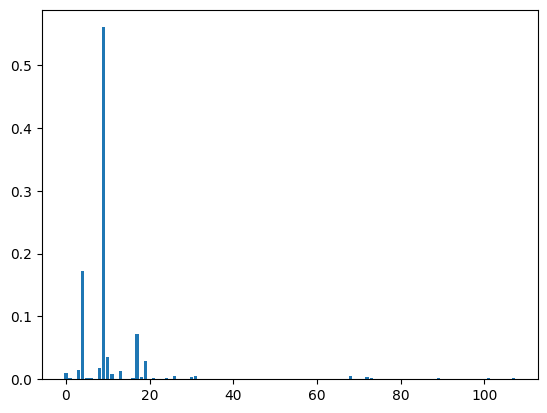

Feature: BS 1, Score: 0.00716
Feature: BS 2, Score: 0.00625
Feature: BS 3, Score: 0.00080
Feature: BS 4, Score: 0.00585
Feature: BS 5, Score: 0.01876
Feature: BS 6, Score: 0.00199
Feature: BS 7, Score: 0.22782
Feature: BS 8, Score: 0.00000
Feature: BS 9, Score: 0.01943
Feature: BS 10, Score: 0.01937
Feature: BS 11, Score: 0.01195
Feature: BS 12, Score: 0.01675
Feature: BS 13, Score: 0.00000
Feature: BS 14, Score: 0.00904
Feature: BS 15, Score: 0.17128
Feature: BS 16, Score: 0.00091
Feature: BS 17, Score: 0.05438
Feature: BS 18, Score: 0.05654
Feature: BS 19, Score: 0.04766
Feature: BS 20, Score: 0.01838
Feature: BS 21, Score: 0.00000
Feature: BS 22, Score: 0.00166
Feature: BS 23, Score: 0.00307
Feature: BS 24, Score: 0.00000
Feature: BS 25, Score: 0.03790
Feature: BS 26, Score: 0.00000
Feature: BS 27, Score: 0.06218
Feature: BS 28, Score: 0.00000
Feature: BS 29, Score: 0.00000
Feature: BS 30, Score: 0.00000
Feature: BS 31, Score: 0.00281
Feature: BS 32, Score: 0.04037
Feature: BS 33, S

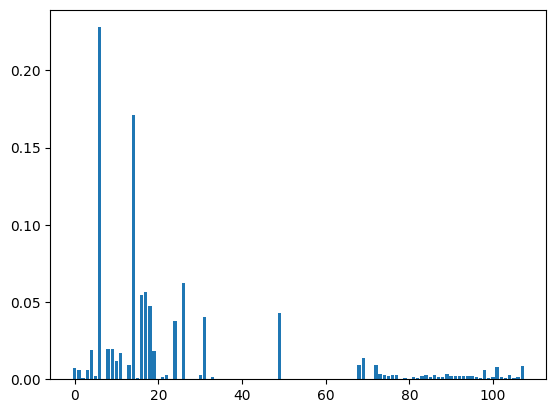

In [ ]:
# RandomForestRegressor feature importance
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor()

feature_importance_calculator(rf_model, x_w_scaled.drop(columns=['timestamp', 'gw_ref']), y['Latitude'], df_cols)
feature_importance_calculator(rf_model, x_w_scaled.drop(columns=['timestamp', 'gw_ref']), y['Longitude'], df_cols)

Feature: BS 1, Score: 0.00884
Feature: BS 2, Score: 0.01643
Feature: BS 3, Score: 0.00064
Feature: BS 4, Score: 0.00958
Feature: BS 5, Score: 0.06425
Feature: BS 6, Score: 0.00236
Feature: BS 7, Score: 0.00057
Feature: BS 8, Score: 0.00000
Feature: BS 9, Score: 0.00578
Feature: BS 10, Score: 0.70170
Feature: BS 11, Score: 0.01482
Feature: BS 12, Score: 0.00344
Feature: BS 13, Score: 0.00000
Feature: BS 14, Score: 0.00616
Feature: BS 15, Score: 0.00087
Feature: BS 16, Score: 0.00056
Feature: BS 17, Score: 0.00251
Feature: BS 18, Score: 0.02828
Feature: BS 19, Score: 0.00126
Feature: BS 20, Score: 0.01221
Feature: BS 21, Score: 0.00000
Feature: BS 22, Score: 0.00384
Feature: BS 23, Score: 0.00204
Feature: BS 24, Score: 0.00000
Feature: BS 25, Score: 0.00183
Feature: BS 26, Score: 0.00000
Feature: BS 27, Score: 0.00976
Feature: BS 28, Score: 0.00000
Feature: BS 29, Score: 0.00000
Feature: BS 30, Score: 0.00000
Feature: BS 31, Score: 0.00686
Feature: BS 32, Score: 0.00284
Feature: BS 33, S

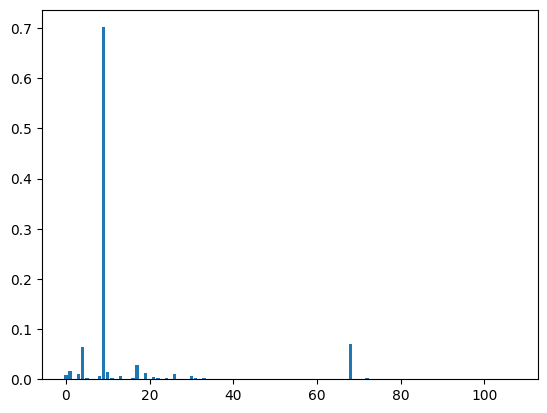

Feature: BS 1, Score: 0.00656
Feature: BS 2, Score: 0.00939
Feature: BS 3, Score: 0.00088
Feature: BS 4, Score: 0.00375
Feature: BS 5, Score: 0.00905
Feature: BS 6, Score: 0.00201
Feature: BS 7, Score: 0.17498
Feature: BS 8, Score: 0.00000
Feature: BS 9, Score: 0.01203
Feature: BS 10, Score: 0.07746
Feature: BS 11, Score: 0.00662
Feature: BS 12, Score: 0.01298
Feature: BS 13, Score: 0.00000
Feature: BS 14, Score: 0.00584
Feature: BS 15, Score: 0.10290
Feature: BS 16, Score: 0.00292
Feature: BS 17, Score: 0.04719
Feature: BS 18, Score: 0.05012
Feature: BS 19, Score: 0.03344
Feature: BS 20, Score: 0.02289
Feature: BS 21, Score: 0.00000
Feature: BS 22, Score: 0.00191
Feature: BS 23, Score: 0.00752
Feature: BS 24, Score: 0.00000
Feature: BS 25, Score: 0.04179
Feature: BS 26, Score: 0.00000
Feature: BS 27, Score: 0.04811
Feature: BS 28, Score: 0.00000
Feature: BS 29, Score: 0.00000
Feature: BS 30, Score: 0.00000
Feature: BS 31, Score: 0.00886
Feature: BS 32, Score: 0.02622
Feature: BS 33, S

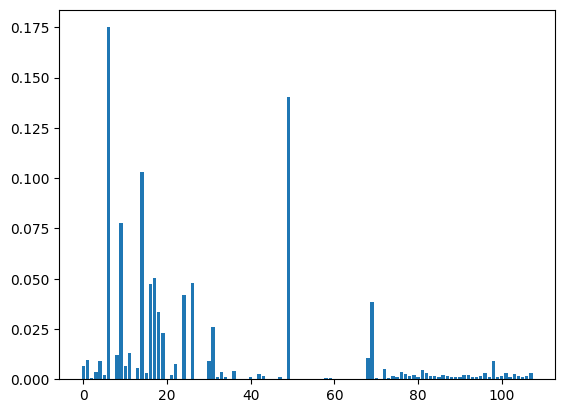

In [34]:
# XGBRegressor feature importance
from xgboost import XGBRegressor

xgb_model = XGBRegressor()

feature_importance_calculator(xgb_model, x_w_scaled.drop(columns=['timestamp', 'gw_ref']), y['Latitude'], df_cols)
feature_importance_calculator(xgb_model, x_w_scaled.drop(columns=['timestamp', 'gw_ref']), y['Longitude'], df_cols)

Feature: BS 1, Score: 0.00000
Feature: BS 2, Score: 0.00000
Feature: BS 3, Score: 0.00000
Feature: BS 4, Score: 0.00000
Feature: BS 5, Score: 0.00000
Feature: BS 6, Score: 0.00000
Feature: BS 7, Score: 0.00000
Feature: BS 8, Score: 0.00000
Feature: BS 9, Score: 0.00000
Feature: BS 10, Score: 0.00000
Feature: BS 11, Score: 0.00000
Feature: BS 12, Score: 0.00000
Feature: BS 13, Score: 0.00000
Feature: BS 14, Score: 0.00000
Feature: BS 15, Score: 0.00000
Feature: BS 16, Score: 0.00000
Feature: BS 17, Score: 0.00000
Feature: BS 18, Score: 0.00000
Feature: BS 19, Score: 0.00000
Feature: BS 20, Score: 0.00000
Feature: BS 21, Score: 0.00000
Feature: BS 22, Score: 0.00000
Feature: BS 23, Score: 0.00000
Feature: BS 24, Score: 0.00000
Feature: BS 25, Score: 0.00000
Feature: BS 26, Score: 0.00000
Feature: BS 27, Score: 0.00000
Feature: BS 28, Score: 0.00000
Feature: BS 29, Score: 0.00000
Feature: BS 30, Score: 0.00000
Feature: BS 31, Score: 0.00000
Feature: BS 32, Score: 0.00000
Feature: BS 33, S

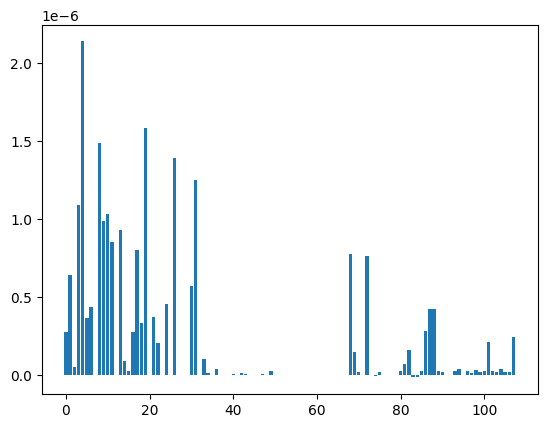

Feature: BS 1, Score: 0.00000
Feature: BS 2, Score: 0.00000
Feature: BS 3, Score: 0.00000
Feature: BS 4, Score: 0.00000
Feature: BS 5, Score: 0.00000
Feature: BS 6, Score: 0.00000
Feature: BS 7, Score: 0.00000
Feature: BS 8, Score: 0.00000
Feature: BS 9, Score: 0.00000
Feature: BS 10, Score: 0.00000
Feature: BS 11, Score: 0.00000
Feature: BS 12, Score: 0.00000
Feature: BS 13, Score: 0.00000
Feature: BS 14, Score: 0.00000
Feature: BS 15, Score: 0.00000
Feature: BS 16, Score: 0.00000
Feature: BS 17, Score: 0.00000
Feature: BS 18, Score: 0.00000
Feature: BS 19, Score: 0.00000
Feature: BS 20, Score: 0.00000
Feature: BS 21, Score: 0.00000
Feature: BS 22, Score: 0.00000
Feature: BS 23, Score: 0.00000
Feature: BS 24, Score: 0.00000
Feature: BS 25, Score: 0.00000
Feature: BS 26, Score: 0.00000
Feature: BS 27, Score: 0.00000
Feature: BS 28, Score: 0.00000
Feature: BS 29, Score: 0.00000
Feature: BS 30, Score: 0.00000
Feature: BS 31, Score: 0.00000
Feature: BS 32, Score: 0.00000
Feature: BS 33, S

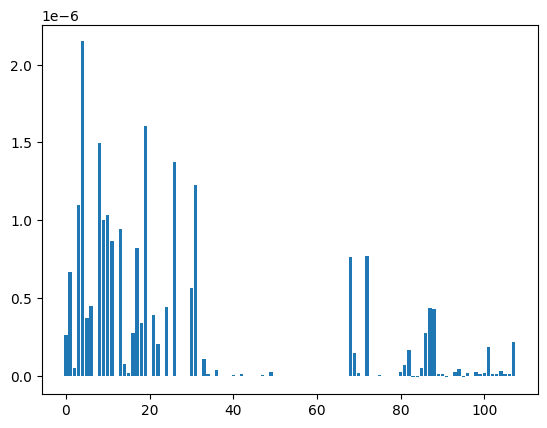

In [36]:
# Permutation feature importance
from sklearn.neighbors import KNeighborsRegressor
df_cols = x_w_scaled.drop(columns=['timestamp', 'gw_ref']).columns.tolist()

knn_model = KNeighborsRegressor()
feature_importance_calculator(knn_model, x_w_scaled.drop(columns=['timestamp', 'gw_ref']), y['Latitude'], df_cols)
feature_importance_calculator(knn_model, x_w_scaled.drop(columns=['timestamp', 'gw_ref']), y['Latitude'], df_cols)